# FUEL CONSUMPTION PREDICTION



> DETAILS

YEAR : Year of manufacture
MAKE: The manufacturer of the vehicle (e.g., Toyota, Ford). The value [16] may represent an encoded or indexed value for a specific manufacturer.

MODEL: A specific model of the vehicle (e.g., Corolla, Mustang). [1160] is likely an encoded or indexed representation.

VEHICLE CLASS: The category of the vehicle (e.g., sedan, SUV, truck). [0] could correspond to a specific class in an encoded dataset.

ENGINE SIZE: The engine's displacement in liters, which in this case is 1.4 L.

CYLINDERS: The number of engine cylinders, indicating [4] in this vehicle.

TRANSMISSION: The type of transmission (e.g., automatic, manual). [16] might be a code for a specific transmission type.

FUEL: The type of fuel used by the vehicle (e.g., gasoline, diesel, electric). [3] is likely a code for a specific fuel type.

HWY (L/100 km): The highway fuel consumption, measured in liters per 100 kilometers. This vehicle consumes 5.6 L per 100 km on the highway.

COMB (L/100 km): The combined (city and highway) fuel consumption, which is 6.8 L/100 km.

COMB (mpg): The combined fuel efficiency in miles per gallon, which is 42 mpg.

EMISSIONS: The amount of CO₂ emissions in grams per kilometer, which is 159 g/km.

In [14]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')



> Data Collection



In [15]:
df = pd.read_csv('/content/drive/MyDrive/TNAU Python, machineLearning/Fuel_Consumption.csv')
df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [16]:
df.isna().sum()

,0
YEAR,0
MAKE,0
MODEL,0
VEHICLE CLASS,0
ENGINE SIZE,0
CYLINDERS,0
TRANSMISSION,0
FUEL,0
FUEL CONSUMPTION,0
HWY (L/100 km),0


In [4]:
from sklearn.preprocessing import LabelEncoder
# Encoding the categorical data
le = LabelEncoder()
df['YEAR'] = le.fit_transform(df['YEAR'])
df['MAKE'] = le.fit_transform(df['MAKE'])
df['MODEL'] = le.fit_transform(df['MODEL'])
df['VEHICLE CLASS'] = le.fit_transform(df['VEHICLE CLASS'])
df['TRANSMISSION'] = le.fit_transform(df['TRANSMISSION'])
df['FUEL'] = le.fit_transform(df['FUEL'])

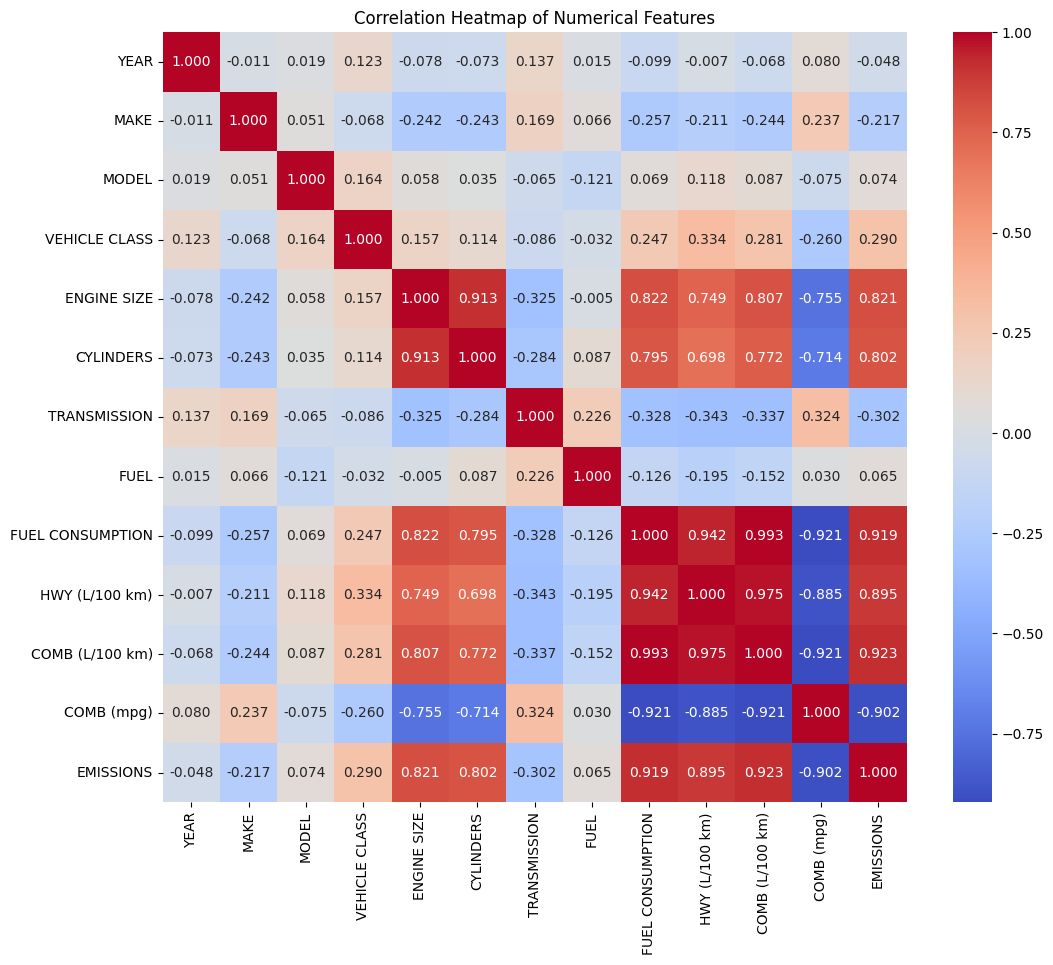

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and contains numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [6]:
x = df.drop(['FUEL CONSUMPTION'], axis=1)
y = df[['FUEL CONSUMPTION']]

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [8]:
print("x_train.shape    :  ", x_train.shape)
print("x_test.shape     :  ", x_test.shape)
print("y_train.shape   :  ", y_train.shape)
print("y_test.shape      :  ", y_test.shape)

x_train.shape    :   (18044, 12)
x_test.shape     :   (4512, 12)
y_train.shape   :   (18044, 1)
y_test.shape      :   (4512, 1)



>Fitting Regression models



In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
r=[]

linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()
svr = SVR()


models = [linear_reg, decision_tree, random_forest, svr]
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Support Vector Regression']

for model, name in zip(models, model_names):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    r.append(r2)
    print("Model: ",name)
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)
    print()

Model:  Linear Regression
Mean Squared Error: 0.006185150417594811
R-squared: 0.9994883661013151

Model:  Decision Tree
Mean Squared Error: 0.009377216312056737
R-squared: 0.9992243193105051

Model:  Random Forest
Mean Squared Error: 0.004976304742907814
R-squared: 0.9995883614746999

Model:  Support Vector Regression
Mean Squared Error: 1.9481811206807393
R-squared: 0.8388470069729079



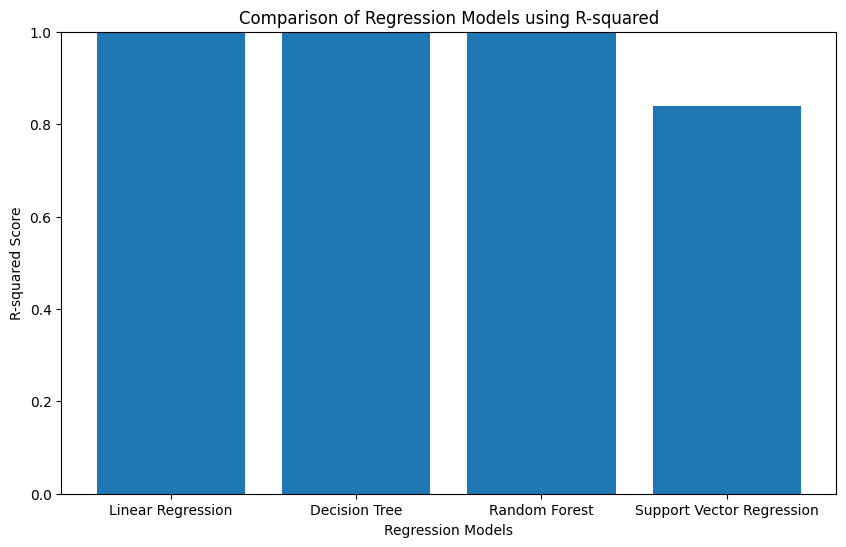

In [10]:
import matplotlib.pyplot as plt
r2_scores = []
for model, name in zip(models, model_names):
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_scores)
plt.xlabel("Regression Models")
plt.ylabel("R-squared Score")
plt.title("Comparison of Regression Models using R-squared")
plt.ylim(0, 1)
plt.show()



> Prediction



In [11]:
custom_values = pd.DataFrame({'YEAR': [16],
                              'MAKE': [16],
                              'MODEL': [1160],
                              'VEHICLE CLASS': [0],
                              'ENGINE SIZE': [1.4],
                              'CYLINDERS': [4],
                              'TRANSMISSION': [16],
                              'FUEL': [3],
                              'HWY (L/100 km)': [5.6],
                              'COMB (L/100 km)': [6.8],
                              'COMB (mpg)' :  [42],
                              'EMISSIONS' : 159})
predicted_consumption_custom = random_forest.predict(custom_values)
print(f"Predicted Fuel Consumption with custom values: {predicted_consumption_custom}")

Predicted Fuel Consumption with custom values: [7.785]


In [12]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 99.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [13]:
import gradio as gr

def predict_fuel_consumption(year, make, model, vehicle_class, engine_size, cylinders, transmission, fuel, hwy_l_100km, comb_l_100km, comb_mpg, emissions):
    new_data_point = pd.DataFrame({'YEAR': [year],
                                  'MAKE': [make],
                                  'MODEL': [model],
                                  'VEHICLE CLASS': [vehicle_class],
                                  'ENGINE SIZE': [engine_size],
                                  'CYLINDERS': [cylinders],
                                  'TRANSMISSION': [transmission],
                                  'FUEL': [fuel],
                                  'HWY (L/100 km)': [hwy_l_100km],
                                  'COMB (L/100 km)': [comb_l_100km],
                                  'COMB (mpg)': [comb_mpg],
                                  'EMISSIONS': [emissions]})
    predicted_consumption = svr.predict(new_data_point)
    predicted_price = predicted_consumption[0] * 100  # Assuming price is 100 times consumption
    return f"{predicted_consumption[0]:.2f} liters", f"Rs. {predicted_price:.2f}"

iface = gr.Interface(
    fn=predict_fuel_consumption,
    inputs=[
        gr.Number(label="Year"),
        gr.Number(label="Make"),
        gr.Number(label="Model"),
        gr.Number(label="Vehicle Class"),
        gr.Number(label="Engine Size"),
        gr.Number(label="Cylinders"),
        gr.Number(label="Transmission"),
        gr.Number(label="Fuel"),
        gr.Number(label="Highway (L/100 km)"),
        gr.Number(label="Combined (L/100 km)"),
        gr.Number(label="Combined (mpg)"),
        gr.Number(label="Emissions")
    ],
    outputs=[
        gr.Textbox(label="Predicted Fuel Consumption"),
        gr.Textbox(label="Predicted Fuel Price")
    ],
    title="Fuel Consumption and Price Prediction",
    description="Enter vehicle specifications to predict fuel consumption and price.",
         theme="huggingface",
    css="""
    body {
        background-color: red; /* Light gray background */
    }
    .gradio-title {
        color: blue; /* Blue title text */
    }
    .gradio-header {
        color: blue; /* Blue header text */
    }
    .gradio-text {
        color: blue; /* Blue text color */
    }
    .gradio-container {
      background-color:#bcf1e4; /* Blue header text */
      border-radius: 10px;
      padding: 20px;
    }
    """
)
iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://fd188b315a92e716dd.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
